In [1]:
import numpy as np
import pandas as pd
import glob 

In [2]:
# mencari directory saat ini
import os
os.getcwd()
# Merubah directory
os.chdir('D:\\ITS\\Tugas Akhir\\Source Code')
# Merubah directory (beneran)
os.chdir('D:/ITS/Tugas Akhir/Source Code')
# Path data
cur_path = "D:/ITS/Tugas Akhir/data/Endaq CSV/"

In [3]:
import os
FOLDER = cur_path
totalFiles = 0
totalDir = 0
for base, dirs, files in os.walk(FOLDER):
    print('Searching in : ',base)
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1

print('Total number of files',totalFiles)
print('Total Number of directories',totalDir)

Searching in :  D:/ITS/Tugas Akhir/data/Endaq CSV/
Searching in :  D:/ITS/Tugas Akhir/data/Endaq CSV/bearing
Searching in :  D:/ITS/Tugas Akhir/data/Endaq CSV/misalignment
Searching in :  D:/ITS/Tugas Akhir/data/Endaq CSV/normal
Searching in :  D:/ITS/Tugas Akhir/data/Endaq CSV/unbalance
Total number of files 4000
Total Number of directories 4


In [4]:
dir_path1 = cur_path+'/normal/'
print('Total Data Normal :',len([entry for entry in os.listdir(dir_path1) if os.path.isfile(os.path.join(dir_path1, entry))]))
dir_path2 = cur_path+'/misalignment/'
print('Total Data Misalignment :',len([entry for entry in os.listdir(dir_path2) if os.path.isfile(os.path.join(dir_path2, entry))]))
dir_path3 = cur_path+'/unbalance'
print('Total Data Unbalance :',len([entry for entry in os.listdir(dir_path3) if os.path.isfile(os.path.join(dir_path3, entry))]))
dir_path4 = cur_path+'/bearing'
print('Total Data Bearing :',len([entry for entry in os.listdir(dir_path4) if os.path.isfile(os.path.join(dir_path4, entry))]))

Total Data Normal : 1000
Total Data Misalignment : 1000
Total Data Unbalance : 1000
Total Data Bearing : 1000


In [5]:
normal_file_names = glob.glob(cur_path+'/normal/*.csv')
imnormal_misalignment = glob.glob(cur_path+'/misalignment/*.csv')
imnormal_unbalance = glob.glob(cur_path+'/unbalance/*.csv')
imnormal_bearing = glob.glob(cur_path+'/bearing/*.csv')

In [6]:
# Preprocessing
from numpy.fft import rfft, rfftfreq
def FFT(data):
    data = np.asarray(data)
    #FFT
    n=len(data)
    dt=1/20000 #time increment in each data
    data=rfft(data)*dt
    freq=rfftfreq(n,dt)
    data=abs(data)
    return data

In [7]:
# Feature Extraction
import scipy
from scipy.stats import kurtosis
from scipy.stats import skew

def std(data):
    data = np.asarray(data)
    stdev=pd.DataFrame(np.std(data, axis=1))
    return stdev
def mean(data):
    data = np.asarray(data)
    M=pd.DataFrame(np.mean(data, axis=1))
    return M
def pp(data):
    data = np.asarray(data)
    PP=pd.DataFrame(np.max(data, axis=1) - np.min(data, axis=1))
    return PP
def Variance(data):
    data = np.asarray(data)
    Var=data.var()
    return Var
def rms(data):
    data = np.asarray(data)
    Rms=pd.DataFrame(np.sqrt(np.mean(data**2, axis=1)))
    return Rms
def Ab_mean(data):
    data = np.asarray(data)
    Abm=pd.DataFrame(np.mean(np.absolute(data),axis=1))
    return Abm
def Shapef(data):
    data = np.asarray(data)
    shapef=pd.DataFrame(rms(data)/Ab_mean(data))
    return shapef
def Impulsef(data):
    data = np.asarray(data)
    impulse=pd.DataFrame(np.max(data)/Ab_mean(data))
    return impulse
def crestf(data):
    data = np.asarray(data)
    crest=pd.DataFrame(np.max(data)/rms(data))
    return crest
def SQRT_AMPL(data):
    data = np.asarray(data)
    SQRTA=pd.DataFrame((np.mean(np.sqrt(np.absolute(data, axis=1))))**2)
    return SQRTA
def clearancef(data):
    data = np.asarray(data)
    clrf=pd.DataFrame(np.max(data, axis=1)/SQRT_AMPL(data))
    return clrf
def kurtosis(data):
    data = pd.DataFrame(data);
    kurt = data.kurt(axis=1);
    return kurt
def skew(data):
    skw = pd.DataFrame.skew(axis=1)
    return skw

In [8]:
# Load Data
# def data normal sumbu x
def data_1x(normal_file_names):
    data1x = pd.DataFrame()
    for f1x in normal_file_names:
        df1x = pd.read_csv(f1x, usecols = [1], header=None) # read the csv file
        data1x = pd.concat([data1x,df1x],axis=1,ignore_index=True)
    return data1x
# def data normal sumbu y
def data_1y(normal_file_names):
    data1y = pd.DataFrame()
    for f1y in normal_file_names:
        df1y = pd.read_csv(f1y, usecols = [2], header=None) # read the csv file
        data1y = pd.concat([data1y,df1y],axis=1,ignore_index=True)
    return data1y
# def data normal sumbu z
def data_1z(normal_file_names):
    data1z = pd.DataFrame()
    for f1z in normal_file_names:
        df1z = pd.read_csv(f1z, usecols = [3], header=None) # read the csv file
        data1z = pd.concat([data1z,df1z],axis=1,ignore_index=True)
    return data1z
# def data misalignment sumbu x
def data_2x(imnormal_misalignment):
    data2x = pd.DataFrame()
    for f2x in imnormal_misalignment:
        df2x = pd.read_csv(f2x, usecols = [1], header=None) # read the csv file
        data2x = pd.concat([data2x,df2x],axis=1,ignore_index=True)
    return data2x
# def data misalignment sumbu y
def data_2y(imnormal_misalignment):
    data2y = pd.DataFrame()
    for f2y in imnormal_misalignment:
        df2y = pd.read_csv(f2y, usecols = [2], header=None) # read the csv file
        data2y = pd.concat([data2y,df2y],axis=1,ignore_index=True)
    return data2y
# def data misalignment sumbu z
def data_2z(imnormal_misalignment):
    data2z = pd.DataFrame()
    for f2z in imnormal_misalignment:
        df2z = pd.read_csv(f2z, usecols = [3], header=None) # read the csv file
        data2z = pd.concat([data2z,df2z],axis=1,ignore_index=True)
    return data2z
# def data unbalance sumbu x
def data_3x(imnormal_unbalance):
    data3x = pd.DataFrame()
    for f3x in imnormal_unbalance:
        df3x = pd.read_csv(f3x, usecols = [1], header=None) # read the csv file
        data3x = pd.concat([data3x,df3x],axis=1,ignore_index=True)
    return data3x
# def data unbalance sumbu y
def data_3y(imnormal_unbalance):
    data3y = pd.DataFrame()
    for f3y in imnormal_unbalance:
        df3y = pd.read_csv(f3y, usecols = [2], header=None) # read the csv file
        data3y = pd.concat([data3y,df3y],axis=1,ignore_index=True)
    return data3y
# def data unbalance sumbu z
def data_3z(imnormal_unbalance):
    data3z = pd.DataFrame()
    for f3z in imnormal_unbalance:
        df3z = pd.read_csv(f3z, usecols = [3], header=None) # read the csv file
        data3z = pd.concat([data3z,df3z],axis=1,ignore_index=True)
    return data3z
# def data bearing sumbu x
def data_4x(imnormal_bearing):
    data4x = pd.DataFrame()
    for f4x in imnormal_bearing:
        df4x = pd.read_csv(f4x, usecols = [1], header=None) # read the csv file
        data4x = pd.concat([data4x,df4x],axis=1,ignore_index=True)
    return data4x
# def data bearing sumbu y
def data_4y(imnormal_bearing):
    data4y = pd.DataFrame()
    for f4y in imnormal_bearing:
        df4y = pd.read_csv(f4y, usecols = [2], header=None) # read the csv file
        data4y = pd.concat([data4y,df4y],axis=1,ignore_index=True)
    return data4y
# def data bearing sumbu z
def data_4z(imnormal_bearing):
    data4z = pd.DataFrame()
    for f4z in imnormal_bearing:
        df4z = pd.read_csv(f4z, usecols = [3], header=None) # read the csv file
        data4z = pd.concat([data4z,df4z],axis=1,ignore_index=True)
    return data4z 

In [9]:
# Data normal tiap sumbu x y z
data_normal_x = data_1x(normal_file_names).T
data_normal_y = data_1y(normal_file_names).T
data_normal_z = data_1z(normal_file_names).T

In [10]:
# Data misalignment tiap sumbu x y z
data_misalignment_x = data_2x(imnormal_misalignment).T
data_misalignment_y = data_2y(imnormal_misalignment).T
data_misalignment_z = data_2z(imnormal_misalignment).T

In [11]:
# Data unbalance tiap sumbu x y z
data_unbalance_x = data_3x(imnormal_unbalance).T
data_unbalance_y = data_3y(imnormal_unbalance).T
data_unbalance_z = data_3z(imnormal_unbalance).T

In [12]:
# Data bearing tiap sumbu x y z
data_bearing_x = data_4x(imnormal_bearing).T
data_bearing_y = data_4y(imnormal_bearing).T
data_bearing_z = data_4z(imnormal_bearing).T

In [13]:
# Drop kolom yang tanpa nilai (NAN)
data_normal_x = data_normal_x.dropna(axis=1)
data_normal_y = data_normal_y.dropna(axis=1)
data_normal_z = data_normal_z.dropna(axis=1)

data_misalignment_x = data_misalignment_x.dropna(axis=1)
data_misalignment_y = data_misalignment_y.dropna(axis=1)
data_misalignment_z = data_misalignment_z.dropna(axis=1)

data_unbalance_x = data_unbalance_x.dropna(axis=1)
data_unbalance_y = data_unbalance_y.dropna(axis=1)
data_unbalance_z = data_unbalance_z.dropna(axis=1)

data_bearing_x = data_bearing_x.dropna(axis=1)
data_bearing_y = data_bearing_y.dropna(axis=1)
data_bearing_z = data_bearing_z.dropna(axis=1)
data_bearing_z

,0,1,2,3,4,5,6,7,8,9,...,99790,99791,99792,99793,99794,99795,99796,99797,99798,99799
0,2.202213,1.039103,-0.363472,-1.364089,-2.065377,-2.664037,-2.681141,-1.723285,-0.346368,0.602936,...,-0.684456,-0.316561,-0.102668,-0.059890,-0.196781,-0.504787,-0.872682,-0.932572,-0.658789,-0.256671
1,0.533118,0.645810,0.550455,0.429095,0.264392,0.143032,0.004334,-0.073683,-0.117026,-0.264392,...,0.112714,0.762986,1.135809,0.867030,0.390163,0.095373,-0.303460,-0.997084,-1.404588,-1.049106
2,-2.090995,-1.238615,-0.297445,0.412872,0.927851,1.061035,0.759151,0.332961,-0.190898,-0.794667,...,0.199738,0.270756,0.359529,0.208615,-0.288511,-0.714618,-0.741250,-0.510442,-0.217493,0.190861
3,1.379185,0.776587,-0.258862,-1.039693,-1.073642,-0.734151,-0.632303,-0.437096,0.173989,0.471045,...,0.195208,-0.695958,-1.612586,-1.918128,-1.680484,-1.315530,-0.848729,-0.297055,0.263106,0.712933
4,0.110410,0.719872,1.320500,1.364664,0.552049,-0.366560,-0.790534,-0.852363,-0.808199,-0.472554,...,-1.713227,-2.993732,-3.461779,-2.852435,-1.660241,0.026493,1.942835,3.338144,3.373468,2.119457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.137712,-0.550848,-0.860701,-0.938164,-0.938164,-0.877915,-0.679954,-0.335673,0.163533,0.602491,...,0.008605,0.550739,0.937977,0.989609,0.808898,0.585160,0.189317,-0.266764,-0.533528,-0.567950
996,0.507790,-0.289566,-0.843518,-1.036562,-1.120494,-0.986203,-0.692440,-0.121702,0.600115,1.296752,...,0.776293,0.625231,0.633623,0.616839,0.323106,-0.155259,-0.457384,-0.507738,-0.432207,-0.281144
997,-0.356674,-0.922133,-1.322304,-1.539788,-1.652879,-1.496291,-0.913433,-0.095693,0.774244,1.461493,...,-0.330543,-0.556705,-0.617594,-0.556705,-0.356639,-0.095684,0.339242,0.835057,1.313475,1.687511
998,0.675247,0.933304,1.053730,0.959109,0.649442,0.262357,-0.055912,-0.589229,-1.139749,-1.475222,...,0.223604,0.068801,-0.043001,-0.154803,-0.215004,-0.189204,-0.249405,-0.387007,-0.455809,-0.455809


In [14]:
# Preprocessing FFT
fft_1x = FFT(data_normal_x)
fft_1y = FFT(data_normal_y)
fft_1z = FFT(data_normal_z)

fft_2x = FFT(data_misalignment_x)
fft_2y = FFT(data_misalignment_y)
fft_2z = FFT(data_misalignment_z)

fft_3x = FFT(data_unbalance_x)
fft_3y = FFT(data_unbalance_y)
fft_3z = FFT(data_unbalance_z)

fft_4x = FFT(data_bearing_x)
fft_4y = FFT(data_bearing_y)
fft_4z = FFT(data_bearing_z)
fft_4y.shape

(1000, 49901)

In [15]:
# Feature Extraction
# shape factor
shapef_1x = Shapef(fft_1x)
shapef_1y = Shapef(fft_1y)
shapef_1z = Shapef(fft_1z)
shapef_2x = Shapef(fft_2x)
shapef_2y = Shapef(fft_2y)
shapef_2z = Shapef(fft_2z)
shapef_3x = Shapef(fft_3x)
shapef_3y = Shapef(fft_3y)
shapef_3z = Shapef(fft_3z)
shapef_4x = Shapef(fft_4x)
shapef_4y = Shapef(fft_4y)
shapef_4z = Shapef(fft_4z)

shapef_1 = pd.concat([shapef_1x,shapef_1y,shapef_1z], axis=1,ignore_index=True)
shapef_2 = pd.concat([shapef_2x,shapef_2y,shapef_2z], axis=1,ignore_index=True)
shapef_3 = pd.concat([shapef_3x,shapef_3y,shapef_3z], axis=1,ignore_index=True)
shapef_4 = pd.concat([shapef_4x,shapef_4y,shapef_4z], axis=1,ignore_index=True)

# root mean square
rms_1x = rms(fft_1x) 
rms_1y = rms(fft_1y)
rms_1z = rms(fft_1z)
rms_2x = rms(fft_2x)
rms_2y = rms(fft_2y)
rms_2z = rms(fft_2z)
rms_3x = rms(fft_3x)
rms_3y = rms(fft_3y)
rms_3z = rms(fft_3z)
rms_4x = rms(fft_4x)
rms_4y = rms(fft_4y)
rms_4z = rms(fft_4z)

rms_1 = pd.concat([rms_1x,rms_1y,rms_1z], axis=1,ignore_index=True)
rms_2 = pd.concat([rms_2x,rms_2y,rms_2z], axis=1,ignore_index=True)
rms_3 = pd.concat([rms_3x,rms_3y,rms_3z], axis=1,ignore_index=True)
rms_4 = pd.concat([rms_4x,rms_4y,rms_4z], axis=1,ignore_index=True)

# impulse factor
Impulsef_1x = Impulsef(fft_1x) 
Impulsef_1y = Impulsef(fft_1y)
Impulsef_1z = Impulsef(fft_1z)
Impulsef_2x = Impulsef(fft_2x)
Impulsef_2y = Impulsef(fft_2y)
Impulsef_2z = Impulsef(fft_2z)
Impulsef_3x = Impulsef(fft_3x)
Impulsef_3y = Impulsef(fft_3y)
Impulsef_3z = Impulsef(fft_3z)
Impulsef_4x = Impulsef(fft_4x)
Impulsef_4y = Impulsef(fft_4y)
Impulsef_4z = Impulsef(fft_4z)

Impulsef_1 = pd.concat([Impulsef_1x,Impulsef_1y,Impulsef_1z], axis=1,ignore_index=True)
Impulsef_2 = pd.concat([Impulsef_2x,Impulsef_2y,Impulsef_2z], axis=1,ignore_index=True)
Impulsef_3 = pd.concat([Impulsef_3x,Impulsef_3y,Impulsef_3z], axis=1,ignore_index=True)
Impulsef_4 = pd.concat([Impulsef_4x,Impulsef_4y,Impulsef_4z], axis=1,ignore_index=True)

#peak factor
pp_1x = pp(fft_1x) 
pp_1y = pp(fft_1y)
pp_1z = pp(fft_1z)
pp_2x = pp(fft_2x)
pp_2y = pp(fft_2y)
pp_2z = pp(fft_2z)
pp_3x = pp(fft_3x)
pp_3y = pp(fft_3y)
pp_3z = pp(fft_3z)
pp_4x = pp(fft_4x)
pp_4y = pp(fft_4y)
pp_4z = pp(fft_4z)

pp_1 = pd.concat([pp_1x,pp_1y,pp_1z], axis=1,ignore_index=True)
pp_2 = pd.concat([pp_2x,pp_2y,pp_2z], axis=1,ignore_index=True)
pp_3 = pd.concat([pp_3x,pp_3y,pp_3z], axis=1,ignore_index=True)
pp_4 = pd.concat([pp_4x,pp_4y,pp_4z], axis=1,ignore_index=True)

#kurtosis factor
kurtosis_1x = kurtosis(fft_1x) 
kurtosis_1y = kurtosis(fft_1y)
kurtosis_1z = kurtosis(fft_1z)
kurtosis_2x = kurtosis(fft_2x)
kurtosis_2y = kurtosis(fft_2y)
kurtosis_2z = kurtosis(fft_2z)
kurtosis_3x = kurtosis(fft_3x)
kurtosis_3y = kurtosis(fft_3y)
kurtosis_3z = kurtosis(fft_3z)
kurtosis_4x = kurtosis(fft_4x)
kurtosis_4y = kurtosis(fft_4y)
kurtosis_4z = kurtosis(fft_4z)

kurtosis_1 = pd.concat([kurtosis_1x,kurtosis_1y,kurtosis_1z], axis=1,ignore_index=True)
kurtosis_2 = pd.concat([kurtosis_2x,kurtosis_2y,kurtosis_2z], axis=1,ignore_index=True)
kurtosis_3 = pd.concat([kurtosis_3x,kurtosis_3y,kurtosis_3z], axis=1,ignore_index=True)
kurtosis_4 = pd.concat([kurtosis_4x,kurtosis_4y,kurtosis_4z], axis=1,ignore_index=True)

#crest factor
crestf_1x = crestf(fft_1x) 
crestf_1y = crestf(fft_1y)
crestf_1z = crestf(fft_1z)
crestf_2x = crestf(fft_2x)
crestf_2y = crestf(fft_2y)
crestf_2z = crestf(fft_2z)
crestf_3x = crestf(fft_3x)
crestf_3y = crestf(fft_3y)
crestf_3z = crestf(fft_3z)
crestf_4x = crestf(fft_4x)
crestf_4y = crestf(fft_4y)
crestf_4z = crestf(fft_4z)

crestf_1 = pd.concat([crestf_1x,crestf_1y,crestf_1z], axis=1,ignore_index=True)
crestf_2 = pd.concat([crestf_2x,crestf_2y,crestf_2z], axis=1,ignore_index=True)
crestf_3 = pd.concat([crestf_3x,crestf_3y,crestf_3z], axis=1,ignore_index=True)
crestf_4 = pd.concat([crestf_4x,crestf_4y,crestf_4z], axis=1,ignore_index=True)

In [16]:
x_1 = pd.concat([shapef_1,rms_1,Impulsef_1,pp_1,kurtosis_1,crestf_1], axis=1,ignore_index=True)
x_2 = pd.concat([shapef_2,rms_2,Impulsef_2,pp_2,kurtosis_2,crestf_2], axis=1,ignore_index=True)
x_3 = pd.concat([shapef_3,rms_3,Impulsef_3,pp_3,kurtosis_3,crestf_3], axis=1,ignore_index=True)
x_4 = pd.concat([shapef_4,rms_4,Impulsef_4,pp_4,kurtosis_4,crestf_4], axis=1,ignore_index=True)
x = pd.concat([x_1,x_2,x_3,x_4], axis=0,ignore_index=True)
x = np.asarray(x)
x.shape

# simpan data hasil ekstraksi fitur fft
fft_x = (pd.DataFrame(x)).to_csv (r'D:\ITS\Tugas Akhir\data\DataFrame\Temporal\fft_x.csv', index = None, header=False) 

In [17]:
# Membuat label

y_1 = np.full((int(len(x_1)),1),0)
y_2 = np.full((int(len(x_2)),1),1)
y_3 = np.full((int(len(x_3)),1),2)
y_4 = np.full((int(len(x_4)),1),3)
y = np.concatenate((y_1,y_2,y_3,y_4), axis=None)
#y = pd.DataFrame(y)
y.shape

# simpan label
y_label = (pd.DataFrame(x)).to_csv (r'D:\ITS\Tugas Akhir\data\DataFrame\Temporal\y_label_new.csv', index = None, header=False) 

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

In [19]:
print("Shape of Train Data : {}".format(X_train.shape))
print("Shape of Test Data : {}".format(X_test.shape))

Shape of Train Data : (3200, 18)
Shape of Test Data : (800, 18)


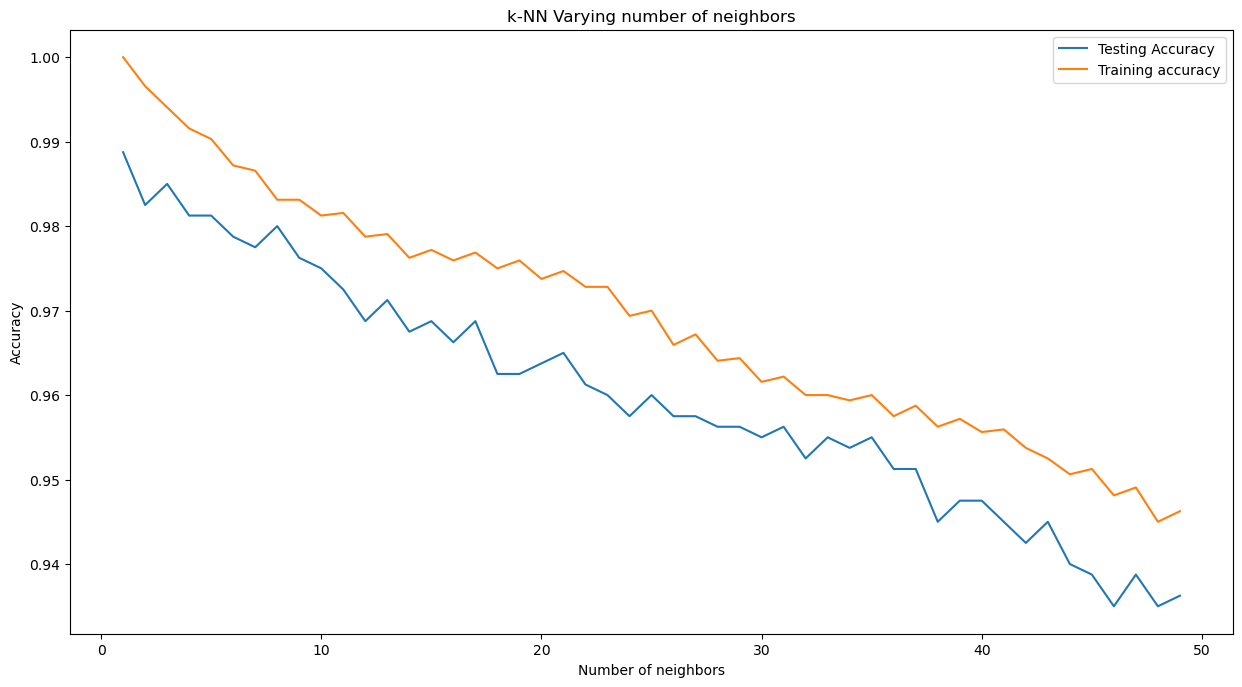

In [28]:
## kNN Machine Learning
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,50)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    #Fit the model
    knn.fit(X_train, y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 
#Generate plot
import matplotlib.pyplot as plt
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1) #n_neighbors = k
outknn = knn.fit(X_train,y_train)
print("k={}NN Accuracy on Train Data: {}".format(3,knn.score(X_train,y_train)))
print("k={}NN Accuracy on Test Data: {}".format(3,knn.score(X_test,y_test)))

## SVM Machine Learning
from sklearn.svm import SVC
svm = SVC(C=3, kernel='rbf', class_weight='balanced', random_state = None)
clf = svm.fit(X_train,y_train)
print("SVM accuracy is {} on Train Dataset".format(svm.score(X_train,y_train)))
print("SVM accuracy is {} on Test Dataset".format(svm.score(X_test,y_test)))

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

model= GaussianNB()
gnb = model.fit(X_train,y_train)
gnb_pred=model.predict(X_test)

print("NB accuracy is {} on Train Dataset".format(model.score(X_train,y_train)))
print("NB accuracy is {} on Test Dataset".format(model.score(X_test,y_test)))

k=3NN Accuracy on Train Data: 0.9940625
k=3NN Accuracy on Test Data: 0.985
SVM accuracy is 0.9875 on Train Dataset
SVM accuracy is 0.985 on Test Dataset
NB accuracy is 0.9803125 on Train Dataset
NB accuracy is 0.98125 on Test Dataset


C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


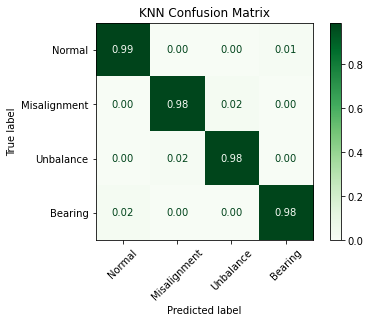

C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


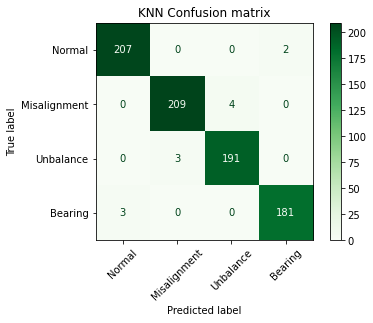

In [22]:
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix

# Generate confusion matrix (normalization)
class_names = ['Normal', 'Misalignment', 'Unbalance', 'Bearing']
matrix_1 = plot_confusion_matrix(outknn, X_test, y_test, display_labels=class_names, xticks_rotation=45,
                                 cmap=plt.cm.Greens,values_format='.2f',
                                 normalize='true')
plt.title('KNN Confusion Matrix')
plt.show(matrix_1)

matrix_2 = plot_confusion_matrix(outknn, X_test, y_test, display_labels=class_names, xticks_rotation=45,
                                 cmap=plt.cm.Greens,
                                 normalize=None)
plt.title('KNN Confusion matrix')
plt.show(matrix_2)

plt.show()

C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


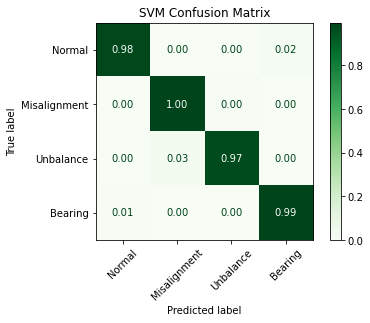

C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


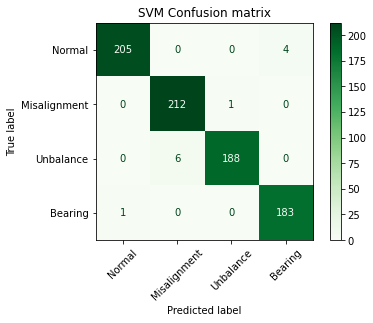

In [23]:
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix

# Generate confusion matrix (normalization)
class_names = ['Normal', 'Misalignment', 'Unbalance', 'Bearing']
matrix_1 = plot_confusion_matrix(clf, X_test, y_test, display_labels=class_names, xticks_rotation=45,
                                 cmap=plt.cm.Greens,values_format='.2f',
                                 normalize='true')
plt.title('SVM Confusion Matrix')
plt.show(matrix_1)

matrix_2 = plot_confusion_matrix(clf, X_test, y_test, display_labels=class_names, xticks_rotation=45,
                                 cmap=plt.cm.Greens,
                                 normalize=None)
plt.title('SVM Confusion matrix')
plt.show(matrix_2)

plt.show()

C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


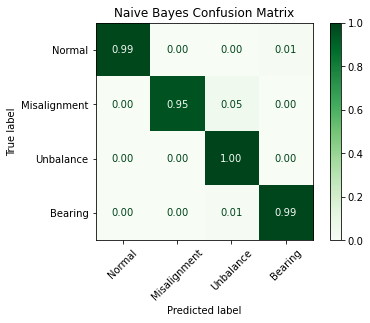

C:\Users\KOMPUTER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


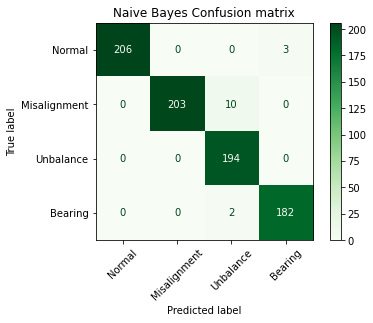

In [24]:
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix

# Generate confusion matrix (normalization)
class_names = ['Normal', 'Misalignment', 'Unbalance', 'Bearing']
matrix_1 = plot_confusion_matrix(gnb, X_test, y_test, display_labels=class_names, xticks_rotation=45,
                                 cmap=plt.cm.Greens,values_format='.2f',
                                 normalize='true')
plt.title('Naive Bayes Confusion Matrix')
plt.show(matrix_1)

matrix_2 = plot_confusion_matrix(gnb, X_test, y_test, display_labels=class_names, xticks_rotation=45,
                                 cmap=plt.cm.Greens,
                                 normalize=None)
plt.title('Naive Bayes Confusion matrix')
plt.show(matrix_2)

plt.show()

In [25]:
import pickle
# save the model to disk
# 'wb' : The w means that you'll be writing to the file, and b refers to binary mode.
pickle.dump(outknn, open('knn_model_fft.sav', 'wb'))
pickle.dump(clf, open('svm_model_fft.sav', 'wb'))
pickle.dump(gnb, open('gnb_model_fft.sav', 'wb'))

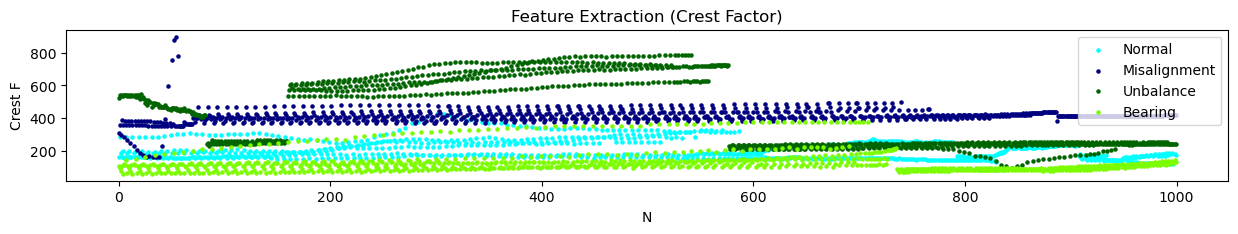

In [54]:
# Plot Scatter
# Scatterplot - Color Change
y1 = crestf_1z
y2 = crestf_2z
y3 = crestf_3z
y4 = crestf_4z
x = np.arange(len(y1))

# Plot
y = plt.scatter(x,y1,s=5,color='cyan',label ='Normal')
y = plt.scatter(x,y2,s=5,color= 'navy',label ='Misalignment')
y = plt.scatter(x,y3,s=5,color= 'darkgreen',label ='Unbalance')
y = plt.scatter(x,y4,s=5,color= 'lawngreen',label ='Bearing')
y = plt.rcParams.update({'figure.figsize':(15,2), 'figure.dpi':100})

# Decorate
y = plt.title('Feature Extraction (Crest Factor)')
y = plt.xlabel('N')
y = plt.ylabel('Crest F')
y = plt.legend()
#y = plt.ylim(0,2)
y = plt.show()